# Mapping jobs location

In [3]:
from indeed import IndeedClient
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import sqlite3
from time import sleep # To prevent overwhelming the server between connections
import pandas as pd # For converting results to a dataframe and bar chart plots
%matplotlib inline
client = IndeedClient(publisher ="9124561496937265")


short_state_names = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}


142


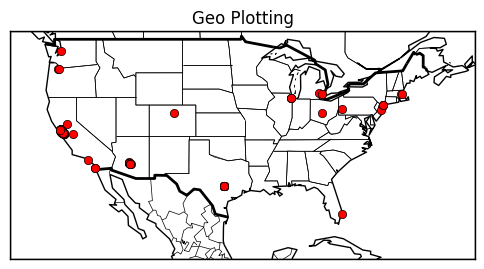

In [4]:

conn = sqlite3.connect('indeed.db')
c = conn.cursor()
#select in jobs all unique values in column = employer
sql_manager = "SELECT * FROM jobs;"
c.execute(sql_manager)
result = c.fetchall()
print(len(result))
data_pts = []        
for entry in result:
    data_pts.append([entry[6], entry[7]])

def mapTut(pts):

    m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
                llcrnrlon=-130,urcrnrlon=-60,resolution='c')
    m.bluemarble()
    m.drawcoastlines()
    m.drawcountries(linewidth=2)
    m.drawstates()
    #m.fillcontinents(color='#04BAE3',lake_color='#FFFFFF')
    m.drawmapboundary(fill_color='#FFFFFF')

    for point in pts:
        if len(point[0] ) > 0:
            lat, lon = float(point[1]), float(point[0])
            x,y = m(lon,lat)
            m.plot(x,y, 'ro')
   
    # Houston, Texas


    
    plt.title("Geo Plotting")
    plt.show()


mapTut(data_pts)

KeyError: ''

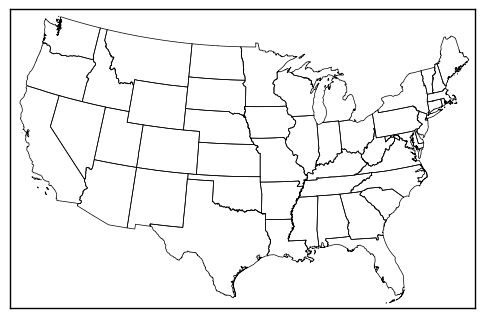

In [29]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# Get data
#select in jobs all unique values in column = employer
sql_states = "SELECT DISTINCT state FROM jobs;"
c.execute(sql_states)
result_states = c.fetchall()
unique_states = []
for item in result_states:
    unique_states.append(item[0])
    
cmap = plt.get_cmap('RdYlBu')
colors = cmap(len(unique_states)) # convert nfloors to colors that we can use later

sql_all = "SELECT jobkey FROM jobs;"
c.execute(sql_all)
all_result = c.fetchall()
all_jk = [x[0] for x in all_result ]
total_cnt = len(all_jk)

# create the map
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)

# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])

for short_state_name in unique_states:
    #Calculate statistics
    sql_job_in_state = "SELECT jobkey FROM jobs WHERE jobs.jobkey='{}';".format(short_state_name)
    c.execute(sql_job_in_state)
    jobs_in_state = c.fetchall()
    jobs_in_state = [x[0] for x in jobs_in_state ]
    cnt_ = len(jobs_in_state)
    ratio = cnt_*1.0/total_cnt
    long_state_name = short_state_names[short_state_name]
    ax = plt.gca() # get current axes instance

    # get Texas and draw the filled polygon
    seg = map.states[state_names.index(long_state_name)]
    poly = Polygon(seg)
    patches.append(poly)
    #ax.add_patch(poly)

#plt.show()

#patches.append(polygon)

collection = PatchCollection(patches)

ax.add_collection(collection)

collection.set_color(colors)

ax.autoscale_view()
plt.show()


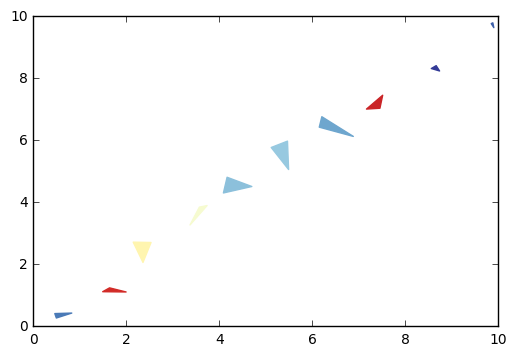

In [22]:
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np

fig,ax = plt.subplots(1)

N = 10
nfloors = np.random.rand(N) # some random data

patches = []

cmap = plt.get_cmap('RdYlBu')
colors = cmap(nfloors) # convert nfloors to colors that we can use later

for i in range(N):
    verts = np.random.rand(3,2)+i # random triangles, plus i to offset them
    polygon = Polygon(verts,closed=True)
    patches.append(polygon)

collection = PatchCollection(patches)

ax.add_collection(collection)

collection.set_color(colors)

ax.autoscale_view()
plt.show()
